In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### 데이터 읽어오기

In [2]:
data = pd.read_csv("C:/Users/cksgh/파이썬/코드잇/data/movies.csv")

In [3]:
df = data.copy()

In [4]:
## Null 값 확인하기 및 타입 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Rating             1999 non-null   float64
 2   Year               2000 non-null   int64  
 3   Month              2000 non-null   object 
 4   Certificate        1966 non-null   object 
 5   Runtime            2000 non-null   object 
 6   Directors          2000 non-null   object 
 7   Stars              2000 non-null   object 
 8   Genre              2000 non-null   object 
 9   Filming_location   2000 non-null   object 
 10  Budget             2000 non-null   object 
 11  Income             2000 non-null   object 
 12  Country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.3+ KB


1. Title : 영화의 제목
2. Rating : 영화의 평점
3. Year : 영화가 상영된 년도
4. Month : 영화가 상영된 달
5. Certifiacte : 영화 관람 등급
6. Runtime : 상영 시간
7. Directors : 감독
8. Stars: 배우
9. Genre : 장르
10. Filming_location : 영화를 찍은 장소
11. Budget: 예산
12. Income : 수입
13. Country_of_Origin : 영화를 만든 국가

In [5]:
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


In [6]:
## 기본 통계량 확인하기

df.describe(include  = 'all')

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
count,2000,1999.000000,2000.000000,2000,1966,2000,2000,2000,2000,2000,2000,2000,2000
unique,1989,NaN,NaN,14,12,113,1082,1990,244,97,305,1856,406
top,The Hunt,NaN,NaN,November,R,104,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...","Action, Adventure, Sci-Fi",USA,Unknown,Unknown,United States
freq,2,NaN,NaN,260,867,50,13,2,92,906,304,145,942
mean,NaN,6.661631,2012.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.911507,5.767723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.900000,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,6.100000,2007.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,6.700000,2012.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,7.300000,2017.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rating

In [297]:
df['Rating']

0       7.8
1       7.6
2       7.3
3       7.8
4       6.4
       ... 
1995    7.1
1996    5.5
1997    5.8
1998    7.1
1999    5.8
Name: Rating, Length: 2000, dtype: float64

In [7]:
# 기본 통계량 계산
mean = df['Rating'].mean()
variance = df['Rating'].var()
std_dev = df['Rating'].std()
skewness = df['Rating'].skew()
kurtosis = df['Rating'].kurt()

# 계산한 통계량 출력
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 6.661630815407704
Variance: 0.8308443861570424
Standard Deviation: 0.9115066572203642
Skewness: -0.7243409888494905
Kurtosis: 1.5862377923056297


<Axes: xlabel='index', ylabel='Rating'>

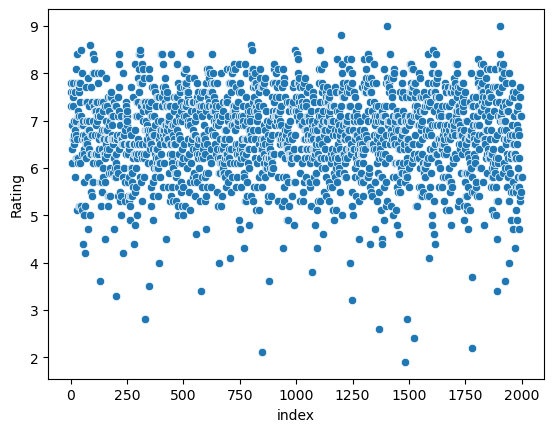

In [8]:
sns.scatterplot(data =df.reset_index() , x = 'index', y='Rating' )

In [9]:
df['Rating'].value_counts().head()

6.6    105
7.1     94
7.0     91
6.5     91
6.3     87
Name: Rating, dtype: int64

In [10]:
## Nan 값 발견
df['Rating'].round(0).isna().sum()

1

In [11]:
## 평균값으로 대체
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

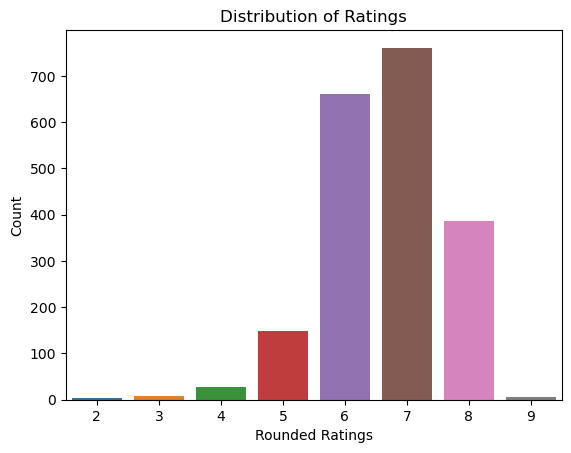

In [12]:
df['Rating_Rounded'] = df['Rating'].round(0).astype(int)


count_df = df['Rating_Rounded'].value_counts().reset_index()
count_df.columns = ['Rating_Rounded', 'Count']
count_df = count_df.sort_values('Rating_Rounded')

sns.barplot(x='Rating_Rounded', y='Count', data=count_df)
plt.xlabel('Rounded Ratings')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

<Axes: xlabel='index', ylabel='Rating'>

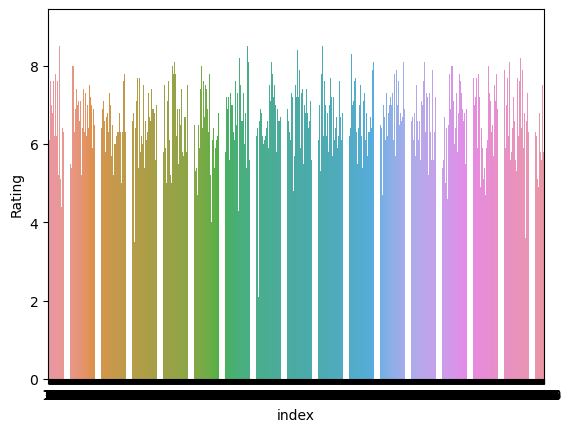

In [13]:
sns.barplot(data = df.reset_index()[['index','Rating']].sort_values(by = 'Rating'), x = 'index', y='Rating')

In [14]:
df['Rating']

0       7.8
1       7.6
2       7.3
3       7.8
4       6.4
       ... 
1995    7.1
1996    5.5
1997    5.8
1998    7.1
1999    5.8
Name: Rating, Length: 2000, dtype: float64

In [15]:
## 평점이 가장 높은 영화 10개 뽑기. 

df[['Title']].loc[list(df['Rating'].sort_values(ascending = False)[:10].index)]

,Title
1401,The Dark Knight
1903,The Lord of the Rings: The Return of the King
1200,Inception
800,Interstellar
84,Drishyam 2
803,Whiplash
1607,The Prestige
1604,The Departed
995,Banshee
1106,The Intouchables


In [16]:
## 평점이 9점인 영화 뽑아보기

df[df['Rating'] == 9 ]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin,Rating_Rounded
1401,The Dark Knight,9.0,2008,July,PG-13,152,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama",USA,"$185,000,000","$1,006,234,167","United States, United Kingdom",9
1903,The Lord of the Rings: The Return of the King,9.0,2003,December,PG-13,201,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...","Action, Adventure, Drama",New Zealand,"$94,000,000","$1,146,457,748","New Zealand, United States",9


### Year

In [17]:
df['Year'].head()

0    2022
1    2022
2    2022
3    2022
4    2022
Name: Year, dtype: int64

In [18]:
df['Year'].value_counts()

2022    100
2021    100
2004    100
2005    100
2006    100
2007    100
2008    100
2009    100
2010    100
2011    100
2012    100
2013    100
2014    100
2015    100
2016    100
2017    100
2018    100
2019    100
2020    100
2003    100
Name: Year, dtype: int64

Text(0.5, 1.0, 'Distribution of Years')

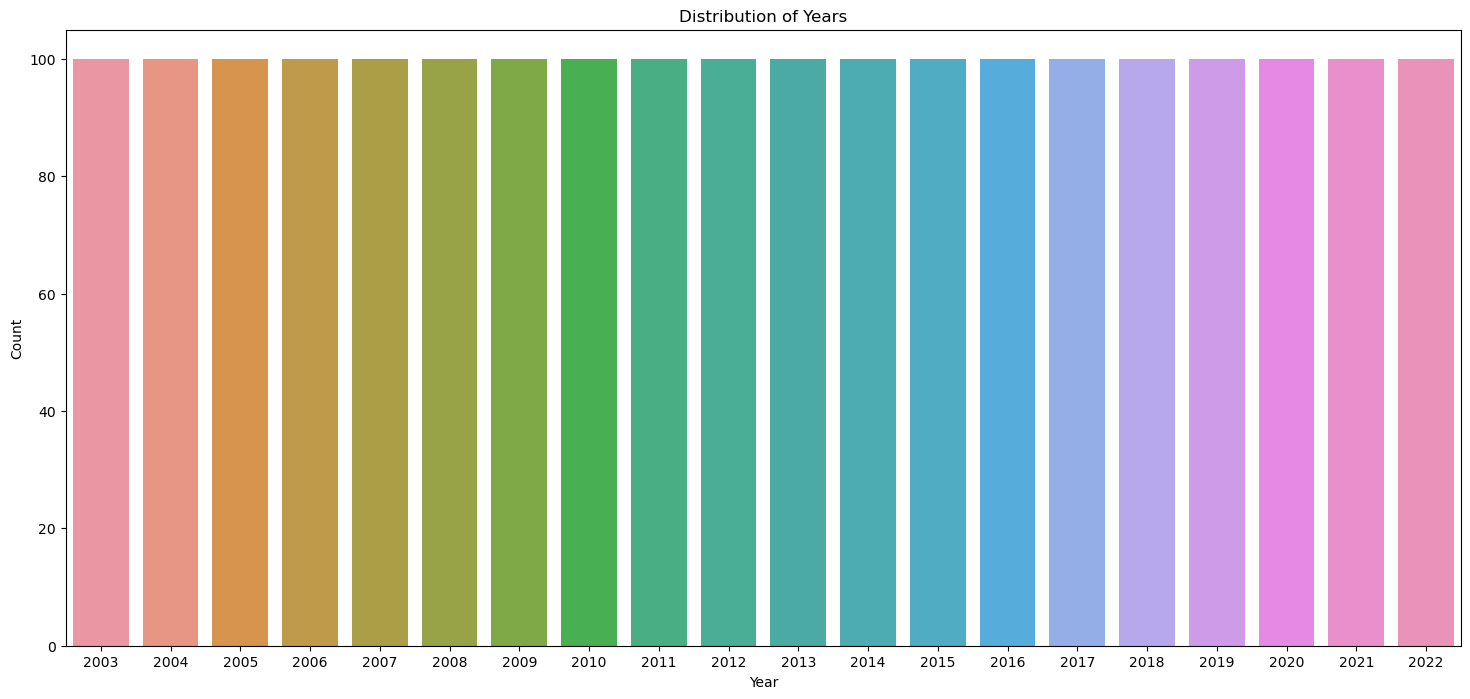

In [19]:
count_year = df['Year'].value_counts().reset_index()
plt.figure(figsize = (18,8))
sns.barplot(data = count_year.sort_values(by='index'), x='index', y='Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Years')

### Month

In [20]:
df['Month']

0       December
1       December
2         August
3       November
4       December
          ...   
1995        June
1996        July
1997    November
1998    February
1999      August
Name: Month, Length: 2000, dtype: object

In [21]:
print("누락된 페이지:" , list(df[(df['Month'] == '2014') | (df['Month'] == '2008')].index))

누락된 페이지: [848, 1439]


In [22]:
## 실제 영화를 검색해서 넣어주기

df.loc[848,'Month'] = 'January'
df.loc[1439,'Month'] = 'October'

In [23]:
df['Month'].value_counts()

November     260
December     249
October      188
June         166
July         152
September    151
March        150
August       149
January      149
May          144
April        121
February     121
Name: Month, dtype: int64

분석을 하기 위해서 범주형 자료를 수치형 자료로 변경

In [24]:
month_to_num = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

In [25]:
df['Month'] = df['Month'].map(month_to_num)

In [26]:
month_counts = df["Month"].value_counts().sort_values()

월별 존재하는 영화의 수 

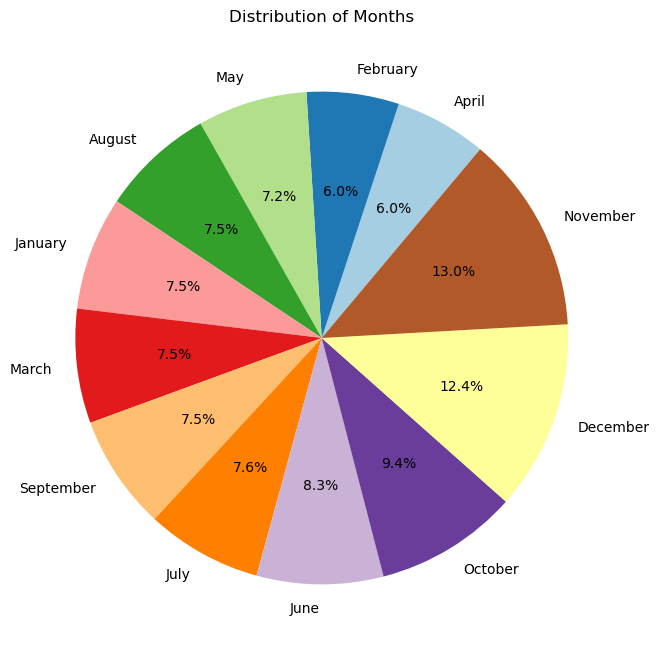

In [27]:
plt.figure(figsize=(8,8))
plt.pie(
    month_counts,
    labels=[{j:p for p,j in month_to_num.items()}[i] for i in month_counts.index],
    autopct='%1.1f%%',
    startangle=50,
    colors=plt.cm.Paired(range(len(month_counts)))
)
plt.title('Distribution of Months')

# 
plt.show()

In [346]:
df['Month'].value_counts().sort_index().reset_index()

,index,Month
0,1,149
1,2,121
2,3,150
3,4,121
4,5,144
5,6,166
6,7,152
7,8,149
8,9,151
9,10,188


<Axes: xlabel='index', ylabel='Month'>

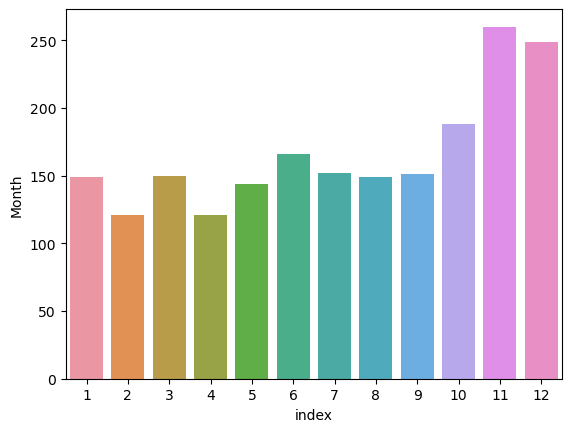

In [349]:
## 11월 달에 영화가 많다는 것, 2,4월 달에 영화가 적다는 것을 알 수 있다.

sns.barplot(data = df['Month'].value_counts().sort_index().reset_index(), x = 'index', y= "Month")

### Certificate

In [350]:
df['Certificate']

0       PG-13
1          PG
2           R
3           R
4       PG-13
        ...  
1995        R
1996    PG-13
1997        R
1998        R
1999        R
Name: Certificate, Length: 2000, dtype: object

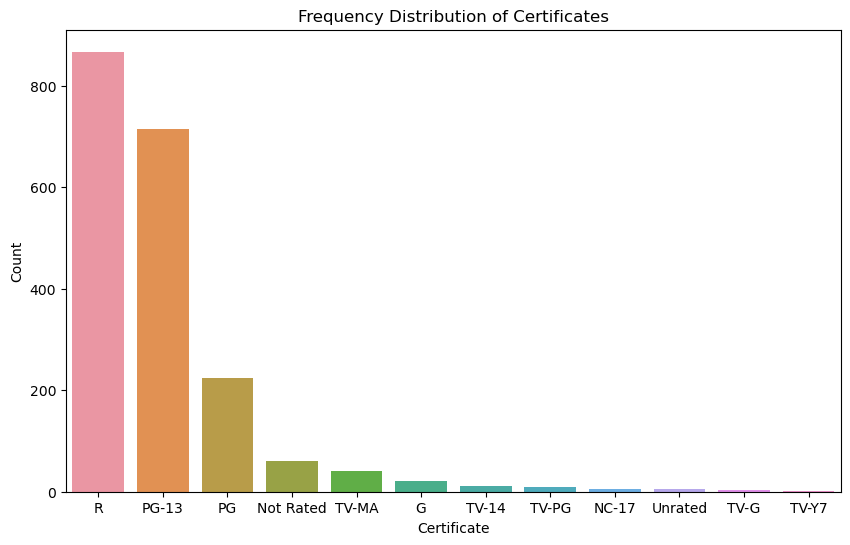

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='index', data=df['Certificate'].value_counts().reset_index(), y = 'Certificate')
plt.title('Frequency Distribution of Certificates')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.show()

## 영화 관람 등급으로는 R, PG-13, PG 순으로 높다는 것을 알 수 있다. 

### Runtime

In [367]:
df['Runtime']

0       192
1       117
2       127
3       114
4       102
       ... 
1995    114
1996    117
1997     98
1998    105
1999     79
Name: Runtime, Length: 2000, dtype: object

In [364]:
df[df['Runtime'] =='Unknown'].index

Int64Index([848, 1249], dtype='int64')

In [365]:
list(df[df['Runtime'] =='Unknown'].index)

[848, 1249]

In [371]:
## 부족한 타임 영화 조사해서 직접 넣어주기

df.loc[848,'Runtime'] = 120
df.loc[1249,'Runtime'] = 100

In [372]:
df['Runtime'] = df['Runtime'].astype(int)

In [373]:
df['Runtime'].sort_values()

995      50
578      70
1831     71
1454     75
477      75
       ... 
1564    191
0       192
1903    201
315     209
123     242
Name: Runtime, Length: 2000, dtype: int32

In [374]:
Q1 = df['Runtime'].quantile(0.25)
Q3 = df['Runtime'].quantile(0.75)

# 상영 시간 분류 함수
def classify_runtime(runtime):
    if runtime <= Q1:
        return 'Short'
    elif runtime >= Q3:
        return 'Long'
    else:
        return 'Mid'

# 상영 시간 분류 적용
df['Runtime_Category'] = df['Runtime'].apply(classify_runtime)

<Axes: ylabel='Runtime_Category'>

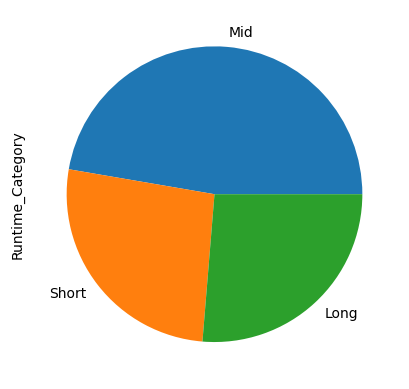

In [375]:
df['Runtime_Category'].value_counts().plot(kind = 'pie')

### Director

In [376]:
df['Directors']

0                            James Cameron
1       Guillermo del Toro, Mark Gustafson
2                             David Leitch
3                          Martin McDonagh
4                         Gerard Johnstone
                       ...                
1995                          Jee woon Kim
1996                           Jan de Bont
1997                     Mathieu Kassovitz
1998                       Prachya Pinkaew
1999                          Chris Kentis
Name: Directors, Length: 2000, dtype: object

In [377]:
### ,로 붙어있는 감독들을 떼어서 만들어주기. 
new_directors = pd.Series([item.strip() for sublist in [j.split(',') for j in [i for i in df['Directors']]] for item in sublist]).value_counts()

In [378]:
new_directors[:8].reset_index()

,index,0
0,Ridley Scott,13
1,Steven Spielberg,12
2,Antoine Fuqua,11
3,Shawn Levy,10
4,Clint Eastwood,10
5,Michael Bay,10
6,Zack Snyder,9
7,Robert Rodriguez,9


<Axes: xlabel='index', ylabel='0'>

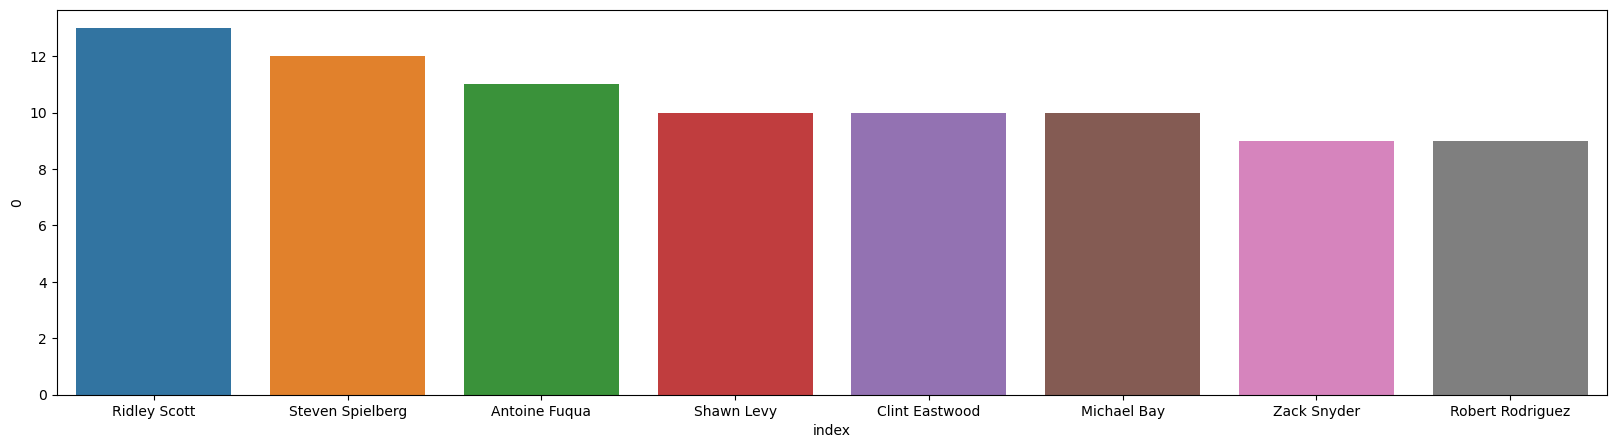

In [379]:
# 가장 영화를 많이 찍은 감독들

plt.figure(figsize = (20,5))
sns.barplot(data = new_directors[:8].reset_index(), x='index', y=0)

In [390]:
## 영화를 제일 많이 만든 5명의 감독들이 만든 영화 리스트 만들기. 

df[df['Directors'].isin(new_directors[:5].index.to_list())]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin,Runtime_Category
5,Emancipation,6.1,2022,12,R,132,Antoine Fuqua,"Will Smith, Ben Foster, Charmaine Bingwa, Gilb...","Action, Thriller",Unknown,"$120,000,000",Unknown,United States,Long
9,The Fabelmans,7.6,2022,11,PG-13,151,Steven Spielberg,"Michelle Williams, Gabriel LaBelle, Paul Dano,...",Drama,USA,"$40,000,000","$9,500,361",United States,Long
122,Free Guy,7.1,2021,8,PG-13,115,Shawn Levy,"Ryan Reynolds, Jodie Comer, Taika Waititi, Lil...","Action, Adventure, Comedy",USA,"$120,000,000","$331,526,598","United States, Canada",Mid
126,House of Gucci,6.6,2021,11,R,158,Ridley Scott,"Lady Gaga, Adam Driver, Al Pacino, Jeremy Irons","Biography, Crime, Drama",Italy,"$75,000,000","$153,265,068","United States, Canada",Long
136,The Last Duel,7.4,2021,10,R,152,Ridley Scott,"Matt Damon, Adam Driver, Jodie Comer, Harriet ...","Action, Drama, History",Ireland,"$100,000,000","$30,552,111","United Kingdom, United States",Long
143,West Side Story,7.2,2021,12,PG-13,156,Steven Spielberg,"Ansel Elgort, Rachel Zegler, Ariana DeBose, Da...","Crime, Drama, Musical",USA,"$100,000,000","$76,016,171",United States,Long
152,The Guilty,6.3,2021,10,R,90,Antoine Fuqua,"Jake Gyllenhaal, Riley Keough, Peter Sarsgaard...","Crime, Drama, Thriller",USA,Unknown,Unknown,United States,Short
165,Infinite,5.4,2021,6,PG-13,106,Antoine Fuqua,"Mark Wahlberg, Chiwetel Ejiofor, Sophie Cookso...","Action, Sci-Fi, Thriller",UK,Unknown,Unknown,United States,Mid
384,Richard Jewell,7.5,2019,12,R,131,Clint Eastwood,"Paul Walter Hauser, Sam Rockwell, Brandon Stan...","Biography, Crime, Drama",Georgia,"$45,000,000","$44,655,962",United States,Long
416,Ready Player One,7.4,2018,3,PG-13,140,Steven Spielberg,"Tye Sheridan, Olivia Cooke, Ben Mendelsohn, Le...","Action, Adventure, Sci-Fi",UK,"$175,000,000","$582,918,849","United States, India",Long


## Stars

In [413]:
df['Stars']

0       Sam Worthington, Zoe Saldana, Sigourney Weaver...
1       Ewan McGregor, David Bradley, Gregory Mann, Bu...
2       Brad Pitt, Joey King, Aaron Taylor Johnson, Br...
3       Colin Farrell, Brendan Gleeson, Kerry Condon, ...
4       Jenna Davis, Amie Donald, Allison Williams, Vi...
                              ...                        
1995    Lim Soo jung, Yum Jung ah, Kim Kap su, Moon Ge...
1996    Angelina Jolie, Gerard Butler, Chris Barrie, C...
1997    Halle Berry, Pen lope Cruz, Robert Downey Jr ,...
1998    Tony Jaa, Phetthai Vongkumlao, Pumwaree Yodkam...
1999    Blanchard Ryan, Daniel Travis, Saul Stein, Mic...
Name: Stars, Length: 2000, dtype: object

In [421]:
### ,로 붙어있는 스타들을 떼어서 만들어주기. 
new_stars = pd.Series([item.strip() for sublist in [j.split(',') for j in [i for i in df['Stars']]] for item in sublist]).value_counts()

In [422]:
new_stars[:5].reset_index()

,index,0
0,Dwayne Johnson,25
1,Mark Wahlberg,24
2,Ryan Reynolds,23
3,Matt Damon,22
4,Brad Pitt,22


<Axes: xlabel='index', ylabel='0'>

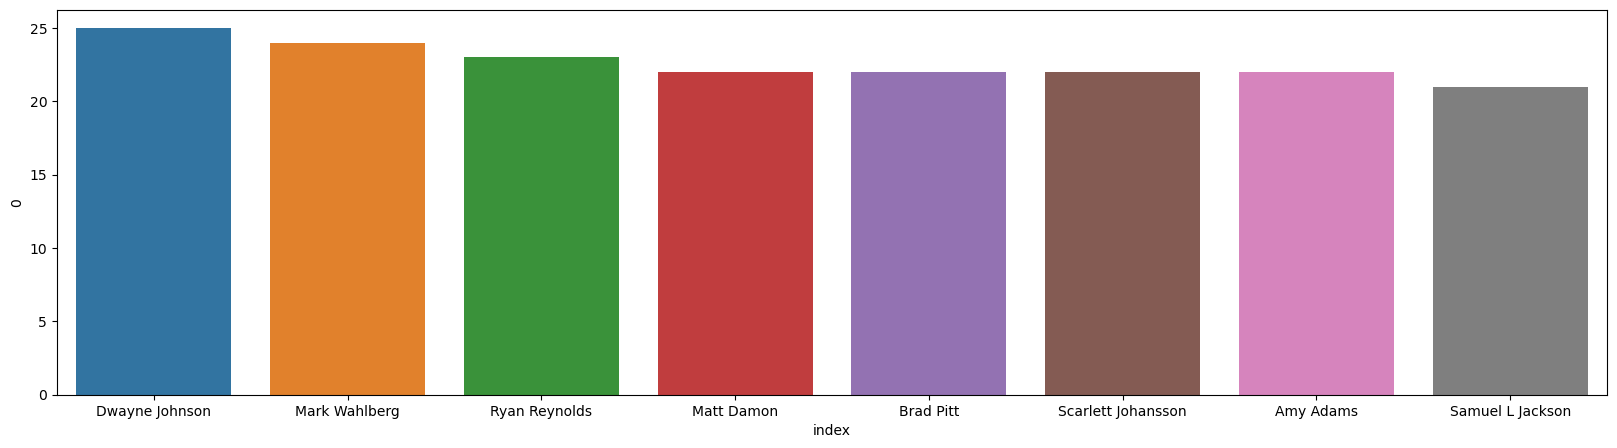

In [425]:
# 가장 영화에 많이 참여한 배우들

plt.figure(figsize = (20,5))
sns.barplot(data = new_stars[:8].reset_index(), x='index', y=0)

In [434]:
## 영화에 가장 많이 참여했던 1등 배우의 작품. 

df[df['Stars'].str.contains("Dwayne Johnson")]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin,Runtime_Category,Profit
14,Black Adam,6.5,2022,10,PG-13,125,Jaume Collet Serra,"Dwayne Johnson, Aldis Hodge, Pierce Brosnan, N...","Action, Adventure, Fantasy",USA,195000000.0,391273355,"United States, Canada, New Zealand, Hungary",Long,1.962734e+08
146,Red Notice,6.3,2021,11,PG-13,118,Rawson Marshall Thurber,"Dwayne Johnson, Ryan Reynolds, Gal Gadot, Ritu...","Action, Comedy, Thriller",Italy,160000000.0,178143,United States,Mid,-1.598219e+08
179,Jungle Cruise,6.6,2021,7,PG-13,127,Jaume Collet Serra,"Dwayne Johnson, Emily Blunt, Edgar Ram rez, Ja...","Action, Adventure, Comedy",USA,200000000.0,220889446,United States,Long,2.088945e+07
345,Jumanji: The Next Level,6.7,2019,12,PG-13,123,Jake Kasdan,"Dwayne Johnson, Jack Black, Kevin Hart, Karen ...","Action, Adventure, Comedy",Canada,125000000.0,801693929,United States,Mid,6.766939e+08
354,Fast & Furious Presents: Hobbs & Shaw,6.5,2019,8,PG-13,137,David Leitch,"Dwayne Johnson, Jason Statham, Idris Elba, Van...","Action, Adventure, Thriller",USA,200000000.0,760732926,"United States, Japan",Long,5.607329e+08
370,Fighting with My Family,7.1,2019,2,PG-13,108,Stephen Merchant,"Dwayne Johnson, Lena Headey, Vince Vaughn, Flo...","Biography, Comedy, Drama",UK,11000000.0,41503392,"United Kingdom, United States",Mid,3.050339e+07
489,Rampage,6.1,2018,4,PG-13,107,Brad Peyton,"Dwayne Johnson, Naomie Harris, Malin Akerman, ...","Action, Adventure, Sci-Fi",USA,120000000.0,428028233,United States,Mid,3.080282e+08
525,Baywatch,5.5,2017,5,R,116,Seth Gordon,"Dwayne Johnson, Zac Efron, Alexandra Daddario,...","Action, Comedy, Crime",USA,69000000.0,177856751,"United Kingdom, China, United States",Mid,1.088568e+08
529,Jumanji: Welcome to the Jungle,6.9,2017,12,PG-13,119,Jake Kasdan,"Dwayne Johnson, Karen Gillan, Kevin Hart, Jack...","Action, Adventure, Comedy",USA,90000000.0,995339117,United States,Mid,9.053391e+08
576,The Fate of the Furious,6.6,2017,4,PG-13,136,F Gary Gray,"Vin Diesel, Jason Statham, Dwayne Johnson, Mic...","Action, Crime, Thriller",USA,250000000.0,1236005118,"United States, China, Japan",Long,9.860051e+08


In [441]:
## 영화에 가장 많이 참여했던 배우 1등의 영화 평점 평균

df[df['Stars'].str.contains("Dwayne Johnson")]['Rating'].mean()

6.46

### Genre

In [455]:
df['Genre']

0       Action, Adventure, Fantasy
1         Animation, Drama, Family
2         Action, Comedy, Thriller
3                    Comedy, Drama
4         Horror, Sci-Fi, Thriller
                   ...            
1995        Drama, Horror, Mystery
1996    Action, Adventure, Fantasy
1997     Horror, Mystery, Thriller
1998       Action, Crime, Thriller
1999      Adventure, Drama, Horror
Name: Genre, Length: 2000, dtype: object

In [456]:
### ,로 붙어있는 스타들을 떼어서 만들어주기. 
new_Genres = pd.Series([item.strip() for sublist in [j.split(',') for j in [i for i in df['Genre']]] for item in sublist]).value_counts()

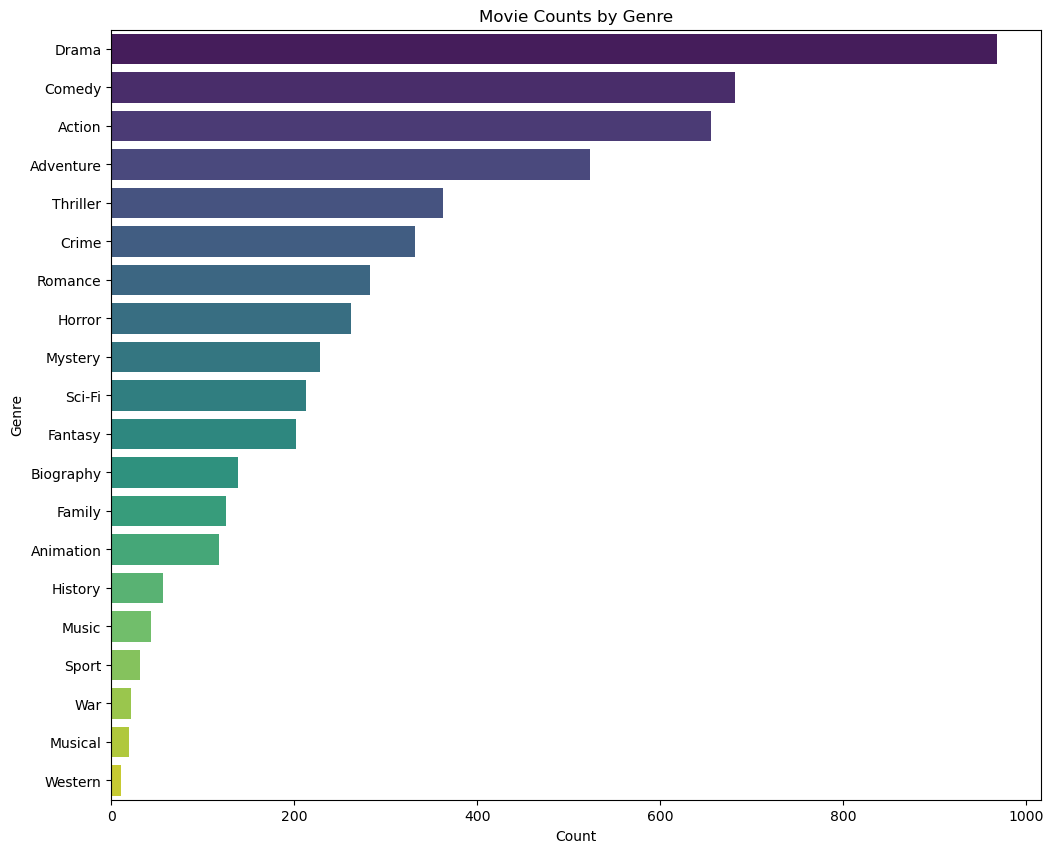

In [457]:
new_Genres = new_Genres.reset_index().sort_values(0, ascending = False)



# 그래프 그리기
plt.figure(figsize=(12, 10))
sns.barplot(x=0, y='index', data=new_Genres, palette='viridis')
plt.title('Movie Counts by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## 드라마가 상당히 많고, 그 다음으로 comedy, Action 순으로 많다는 것을 알 수 있음. 

In [459]:
new_Genres.head()

,index,0
0,Drama,968
1,Comedy,682
2,Action,656
3,Adventure,523
4,Thriller,363


### Budget 

In [391]:
# budget의 컬럼에는 달러를 포함한 다양한 화폐가 존재한다. 그리하여 비교를 위해 실제 환율로 변환해주기 (기준 : 달러)

df['Budget'] #Unknown 값은 평균 값으로 대체.

0       $350,000,000 
1        $35,000,000 
2        $85,900,000 
3             Unknown
4        $12,000,000 
            ...      
1995          Unknown
1996     $95,000,000 
1997     $40,000,000 
1998          Unknown
1999        $500,000 
Name: Budget, Length: 2000, dtype: object

In [392]:
# 화폐 단위 추출 함수
def extract_currency(value):
    match = re.search(r'([^\d\s,]+)', value)
    return match.group(1) if match else None

print({i for i in df['Budget'].apply(extract_currency)})

{'£', '€', '₹', '$', '₩', 'NOK', '¥', 'SEK', 'CN¥', 'A$', 'CA$', 'DKK', 'Unknown'}


In [393]:
## 달러를 기준으로 실제 환율 적용하기. 오른쪽 달러 기준.
exchange_rates = {
    '$': 1,
    'A$': 0.65,
    'CA$': 0.74,
    'CN¥': 0.14,
    'DKK': 0.14,
    'NOK': 0.094,
    'SEK': 0.091,
    '£': 1.26,
    '¥': 0.0069,
    '₩': 0.00076,
    '€': 1.08,
    '₹': 0.012
}


In [394]:
extract_currency(df['Budget'][121])

'€'

In [395]:
def Adjust_Exchange_rate(value): #환율에 맞게 전부 달러로 변환해주기.
    if value =='Unknown':
        return 'Unknown'
    else:
        return exchange_rates[extract_currency(value)] * int(value.replace(extract_currency(value), "").replace(',' ,'').strip())
    

In [396]:
df['Budget'] = df['Budget'].apply(Adjust_Exchange_rate)

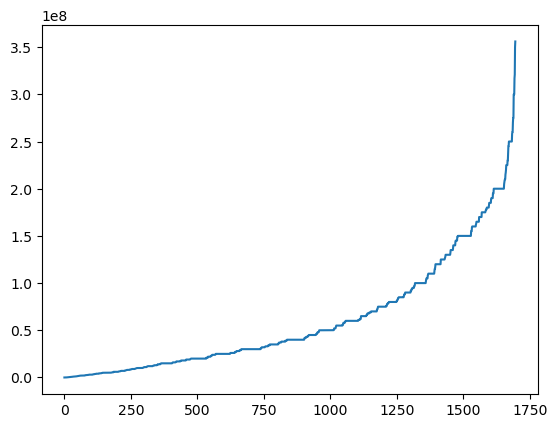

In [397]:
plt.plot(pd.Series([i for i in df['Budget'] if i != 'Unknown']).sort_values().to_list())

In [398]:
mean_value = np.array([i for i in df['Budget'] if i != 'Unknown']).astype(int).mean() #남은 값들은 평균으로 대체해주기. 

In [399]:
df['Budget'] = df['Budget'].replace("Unknown", np.nan).fillna(mean_value)

### Income

In [400]:
df['Income']

0       $2,267,946,983 
1             $108,967 
2         $239,268,602 
3          $19,720,823 
4         $171,253,910 
             ...       
1995        $1,062,878 
1996      $160,099,222 
1997      $141,591,324 
1998       $20,235,426 
1999       $54,683,487 
Name: Income, Length: 2000, dtype: object

In [401]:
## 수입은 전부 달러와 Unknown으로 되어 있음.

{i for i in df['Income'].apply(extract_currency)}

{'$', 'Unknown'}

In [402]:
df['Income'].replace("$", '')

0       $2,267,946,983 
1             $108,967 
2         $239,268,602 
3          $19,720,823 
4         $171,253,910 
             ...       
1995        $1,062,878 
1996      $160,099,222 
1997      $141,591,324 
1998       $20,235,426 
1999       $54,683,487 
Name: Income, Length: 2000, dtype: object

In [403]:
df['Income'] = df['Income'].str.replace("$", "").str.replace(",","").apply(lambda x: x.strip())

C:\Users\cksgh\AppData\Local\Temp\ipykernel_12196\592521383.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace("$", "").str.replace(",","").apply(lambda x: x.strip())


In [404]:
df['Income']

0       2267946983
1           108967
2        239268602
3         19720823
4        171253910
           ...    
1995       1062878
1996     160099222
1997     141591324
1998      20235426
1999      54683487
Name: Income, Length: 2000, dtype: object

In [405]:
Income_mean = np.array([i for i in df['Income'] if i != 'Unknown']).astype(float).mean()

In [406]:
### 마찬가지로 Unknown 값을 평균으로 대체해주고, profit 이라는 column 만들어주기

df['Income'] = df['Income'].replace("Unknown", np.nan).fillna(Income_mean)

In [407]:
df['Income'][:6]

0          2267946983
1              108967
2           239268602
3            19720823
4           171253910
5    188720624.707817
Name: Income, dtype: object

In [479]:
df['Income'] = df['Income'].astype(float)

In [408]:
df['Profit'] = df['Income'].astype(float) - df['Budget'].astype(float)

## Profit

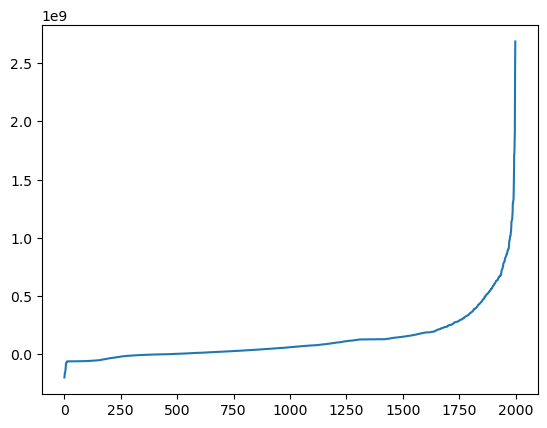

In [409]:
## 대부분의 데이터가 수익이 많이 없고, 상위권 영화만 수익이 많다는 사실. 

plt.plot(df['Profit'].sort_values().to_list())

In [410]:
df['Profit']

0       1.917947e+09
1      -3.489103e+07
2       1.533686e+08
3      -4.142543e+07
4       1.592539e+08
            ...     
1995   -6.008337e+07
1996    6.509922e+07
1997    1.015913e+08
1998   -4.091082e+07
1999    5.418349e+07
Name: Profit, Length: 2000, dtype: float64

In [555]:
## 상위 10개의 수익 높은 영화들

df.loc[list(df['Profit'].sort_values(ascending = False)[:10].index)].head(10)

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin,Runtime_Category,Profit,Seasons
1300,Avatar,7.8,2009,12,PG-13,162,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",USA,237000000.0,2.922918e+09,United States,Long,2.685918e+09,Winter
305,Avengers: Endgame,8.4,2019,4,PG-13,181,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Evans, Mark Ruffalo, ...","Action, Adventure, Drama",UK,356000000.0,2.797501e+09,United States,Long,2.441501e+09,Spring
0,Avatar: The Way of Water,7.8,2022,12,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States,Long,1.917947e+09,Winter
714,Star Wars: Episode VII - The Force Awakens,7.8,2015,12,PG-13,138,J J Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...","Action, Adventure, Sci-Fi",Ireland,245000000.0,2.069522e+09,United States,Long,1.824522e+09,Winter
405,Avengers: Infinity War,8.4,2018,4,PG-13,149,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Hemsworth, Mark Ruffa...","Action, Adventure, Sci-Fi",UK,321000000.0,2.048360e+09,United States,Long,1.727360e+09,Spring
103,Spider-Man: No Way Home,8.3,2021,12,PG-13,148,Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...","Action, Adventure, Fantasy",Iceland,200000000.0,1.917430e+09,United States,Long,1.717430e+09,Winter
723,Jurassic World,6.9,2015,6,PG-13,124,Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...","Action, Adventure, Sci-Fi",USA,150000000.0,1.671537e+09,United States,Long,1.521537e+09,Summer
344,The Lion King,6.8,2019,7,PG,118,Jon Favreau,"Donald Glover, Beyonc , Seth Rogen, Chiwetel E...","Animation, Adventure, Drama",South Africa,260000000.0,1.663250e+09,"United States, United Kingdom",Mid,1.403250e+09,Summer
753,Furious 7,7.1,2015,4,PG-13,137,James Wan,"Vin Diesel, Paul Walker, Dwayne Johnson, Jason...","Action, Crime, Thriller",United Arab Emirates,190000000.0,1.515341e+09,"United States, China, Japan, Canada, United Ar...",Long,1.325341e+09,Spring
27,Top Gun: Maverick,8.4,2022,5,PG-13,130,Joseph Kosinski,"Tom Cruise, Jennifer Connelly, Miles Teller, V...","Action, Drama",USA,170000000.0,1.488733e+09,United States,Long,1.318733e+09,Spring


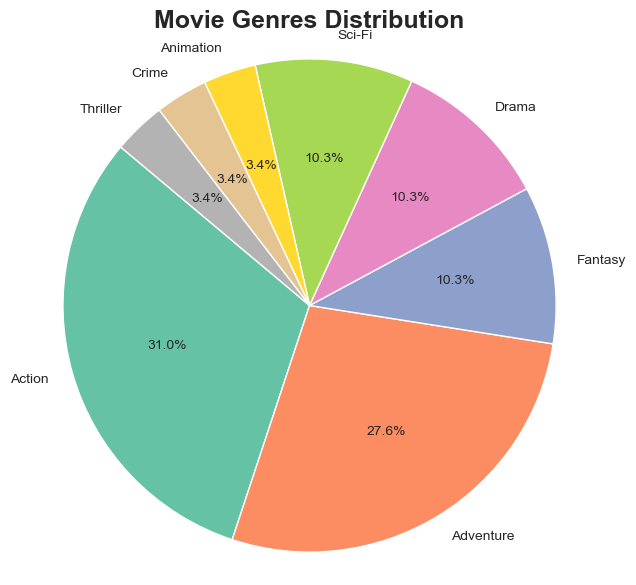

In [560]:
genre = pd.Series([item.strip() for sublist in [j.split(',') for j in [i for i in df.loc[list(df['Profit'].sort_values(ascending = False)[:10].index)]['Genre']]] for item in sublist]).value_counts() 

# Pie 그래프 그리기
plt.figure(figsize=(7, 7))  # 그래프 크기 설정
plt.pie(genre, labels = genre.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(genre)))
plt.axis('equal')  # 원 형태 유지

# 제목 추가
plt.title('Movie Genres Distribution', fontsize=18, fontweight='bold')

# 그래프 보여주기
plt.show()

# 액션 영화와 어드밴쳐 장르가 절반이다. 

In [469]:
## 수익들과 다른 변수들간의 상관계수

df.corr()

C:\Users\cksgh\AppData\Local\Temp\ipykernel_12196\2841983722.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Year,Month,Runtime,Budget,Profit
Rating,1.000000,-0.014964,0.051432,0.377890,0.018875,0.195023
Year,-0.014964,1.000000,0.132499,0.117729,0.085284,0.029783
Month,0.051432,0.132499,1.000000,0.069080,0.051224,0.016812
Runtime,0.377890,0.117729,0.069080,1.000000,0.345591,0.248559
Budget,0.018875,0.085284,0.051224,0.345591,1.000000,0.583714
Profit,0.195023,0.029783,0.016812,0.248559,0.583714,1.000000


### 연도별 예산/ 매출/ 수익 계산하기

In [482]:
df_by_year = df.groupby("Year")[['Budget','Income','Profit']].mean()

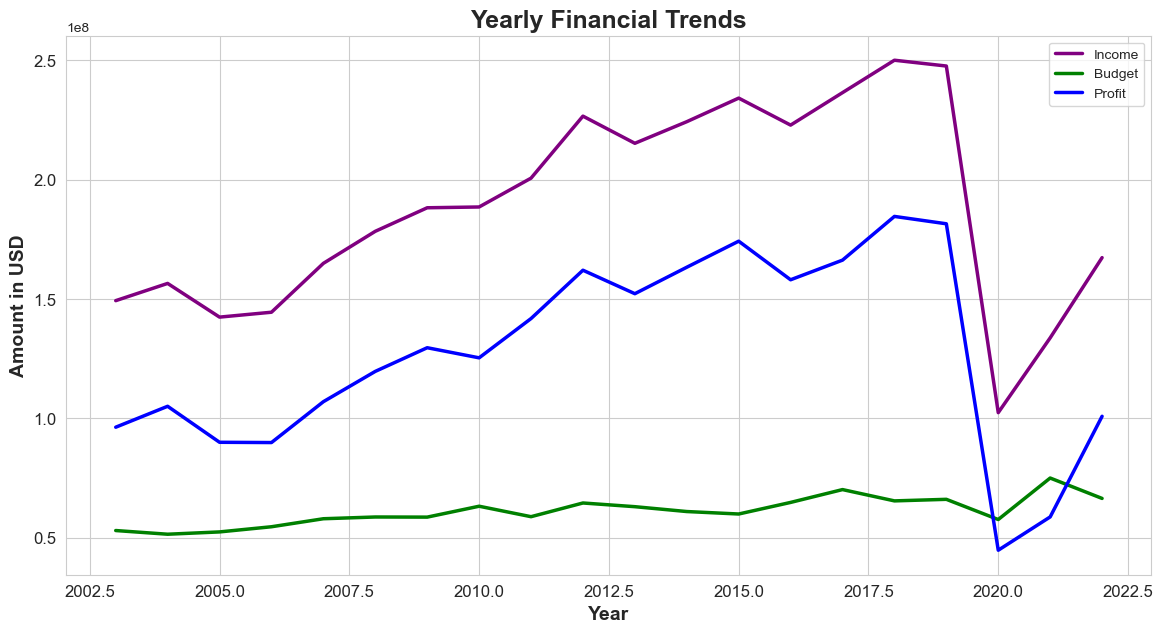

In [496]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 설정
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(14, 7))  # 그래프 크기 설정

# 각 Series에 대한 선 그래프 그리기
ax1 = df_by_year['Income'].plot(color='purple', linewidth=2.5, label='Income')
ax2 = df_by_year['Budget'].plot(color='green', linewidth=2.5, label='Budget')
ax3 = df_by_year['Profit'].plot(color='blue', linewidth=2.5, label='Profit')

# 제목과 레이블 추가
plt.title('Yearly Financial Trends', fontsize=18, fontweight='bold')  # 제목
plt.xlabel('Year', fontsize=14, fontweight='bold')  # x축 레이블
plt.ylabel('Amount in USD', fontsize=14, fontweight='bold')  # y축 레이블

# 축 값의 글꼴 크기 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.show()


## 전반적으로 영화 산업의 발전의 경향성을 볼 수 있다. 예산 투자 대비, 수입과 이득이 매우 많았지만 코로나 이후 그래프의 급감을 볼 수 있음.

### 영화가 나온 국가, 장르, 계절 구분하기

In [498]:
df['Country_of_origin']

0                                           United States
1                           United States, Mexico, France
2                                    Japan, United States
3                  Ireland, United Kingdom, United States
4                                           United States
                              ...                        
1995                                          South Korea
1996    United States, Germany, Japan, United Kingdom,...
1997                 United States, France, Canada, Spain
1998                          Thailand, France, Hong Kong
1999                                        United States
Name: Country_of_origin, Length: 2000, dtype: object

In [509]:
### ,로 붙어있는 나라들을 떼어서 만들어주기. 
new_Country = pd.Series([item.strip() for sublist in [j.split(',') for j in [i for i in df['Country_of_origin']]] for item in sublist]).value_counts()

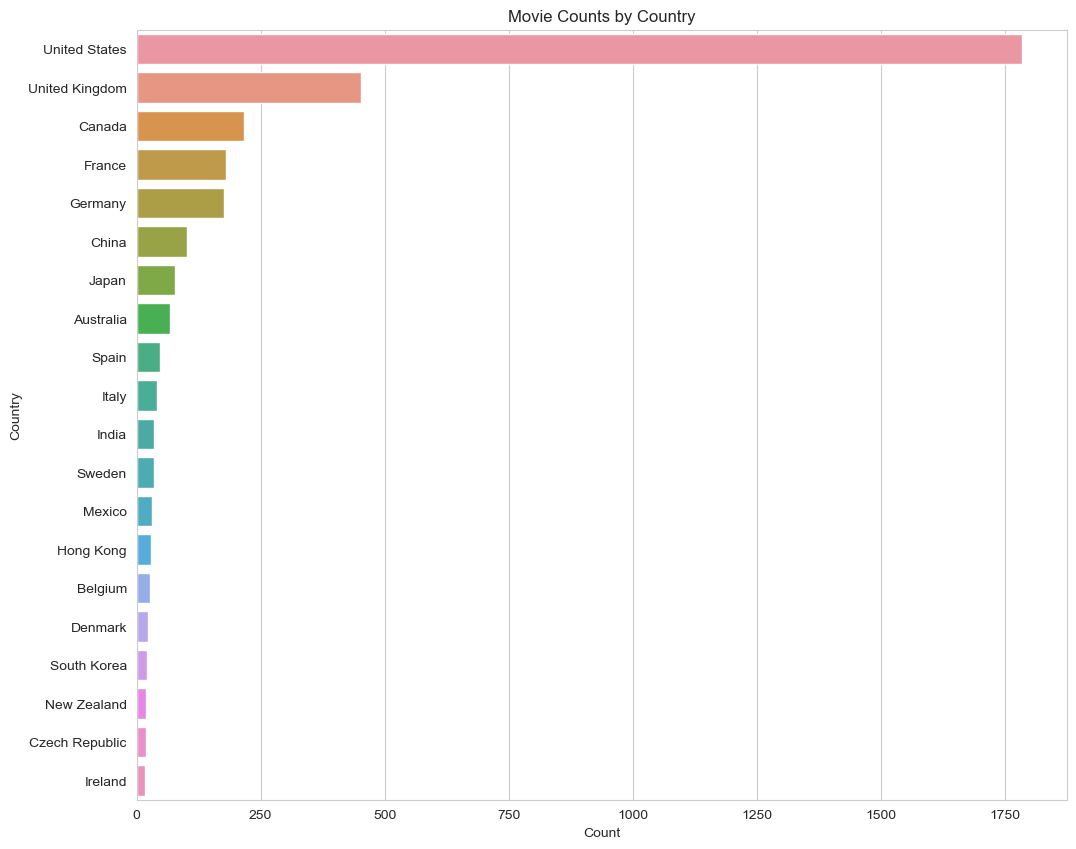

In [511]:
new_Country = new_Country.reset_index().sort_values(0, ascending = False)



# 그래프 그리기
plt.figure(figsize=(12, 10))
sns.barplot(x=0, y='index', data=new_Country[:20])
plt.title('Movie Counts by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

## 나라가 미국, 영국, 캐나다 순으로 많이 촬영되었다는 것을 알 수 있음.

In [532]:
def Season_df(value):
    if value >=3 and value <=5:
        return 'Spring'
    elif value >5 and value <=8:
        return 'Summer'
    elif value >8 and value <= 11:
        return 'Autumn'
    else:
        return 'Winter'
    

In [533]:
df['Seasons'] = df['Month'].apply(Season_df)

In [535]:
## 계절은 가을, 겨울, 여름, 봄 순으로 많다는 것을 알 수 있다.

pd.DataFrame(df.groupby('Seasons').count()['Title']).rename(columns = {'Title': 'Count'})

,Count
Seasons,
Autumn,599
Spring,415
Summer,467
Winter,519


In [537]:
### 가을의 특징

df[df['Seasons'] =='Autumn']['Directors']

3                Martin McDonagh
6                David O Russell
9               Steven Spielberg
10                    Mark Mylod
13               Luca Guadagnino
                  ...           
1985    Joe Dante, Eric Goldberg
1988                Audrey Wells
1990                 Gary Fleder
1994                Jane Campion
1997           Mathieu Kassovitz
Name: Directors, Length: 599, dtype: object

In [546]:
### ,로 붙어있는 감독,배우들을 떼어서 만들어주기. 
Autumn_Direct = pd.Series([item.strip() for sublist in [j.split(',') for j in [i for i in df[df['Seasons'] =='Autumn']['Directors']]] for item in sublist]).value_counts() 
Autumn_Stars = pd.Series([item.strip() for sublist in [j.split(',') for j in [i for i in df[df['Seasons'] =='Autumn']['Stars']]] for item in sublist]).value_counts()

<Axes: >

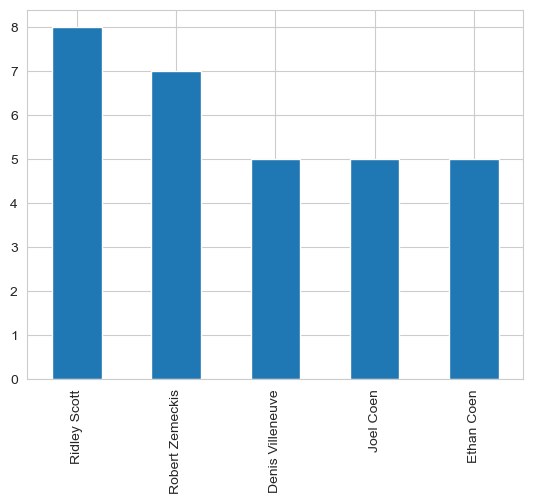

In [545]:
Autumn_Direct[:5].plot(kind = 'bar')

<Axes: >

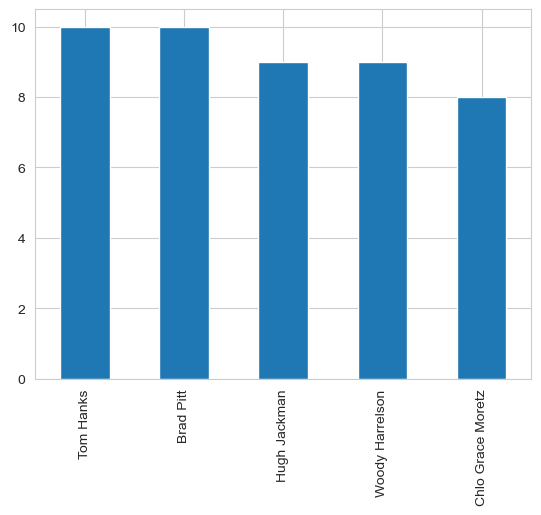

In [547]:
Autumn_Stars[:5].plot(kind = 'bar')

In [548]:
### 계절별로 영화를 가장 많이 찍은 배우는?

Spring_Stars = pd.Series([item.strip() for sublist in [j.split(',') for j in [i for i in df[df['Seasons'] =='Spring']['Stars']]] for item in sublist]).value_counts()
Summer_Stars = pd.Series([item.strip() for sublist in [j.split(',') for j in [i for i in df[df['Seasons'] =='Summer']['Stars']]] for item in sublist]).value_counts()
Autumn_Stars = pd.Series([item.strip() for sublist in [j.split(',') for j in [i for i in df[df['Seasons'] =='Autumn']['Stars']]] for item in sublist]).value_counts()
Winter_Stars = pd.Series([item.strip() for sublist in [j.split(',') for j in [i for i in df[df['Seasons'] =='Winter']['Stars']]] for item in sublist]).value_counts()

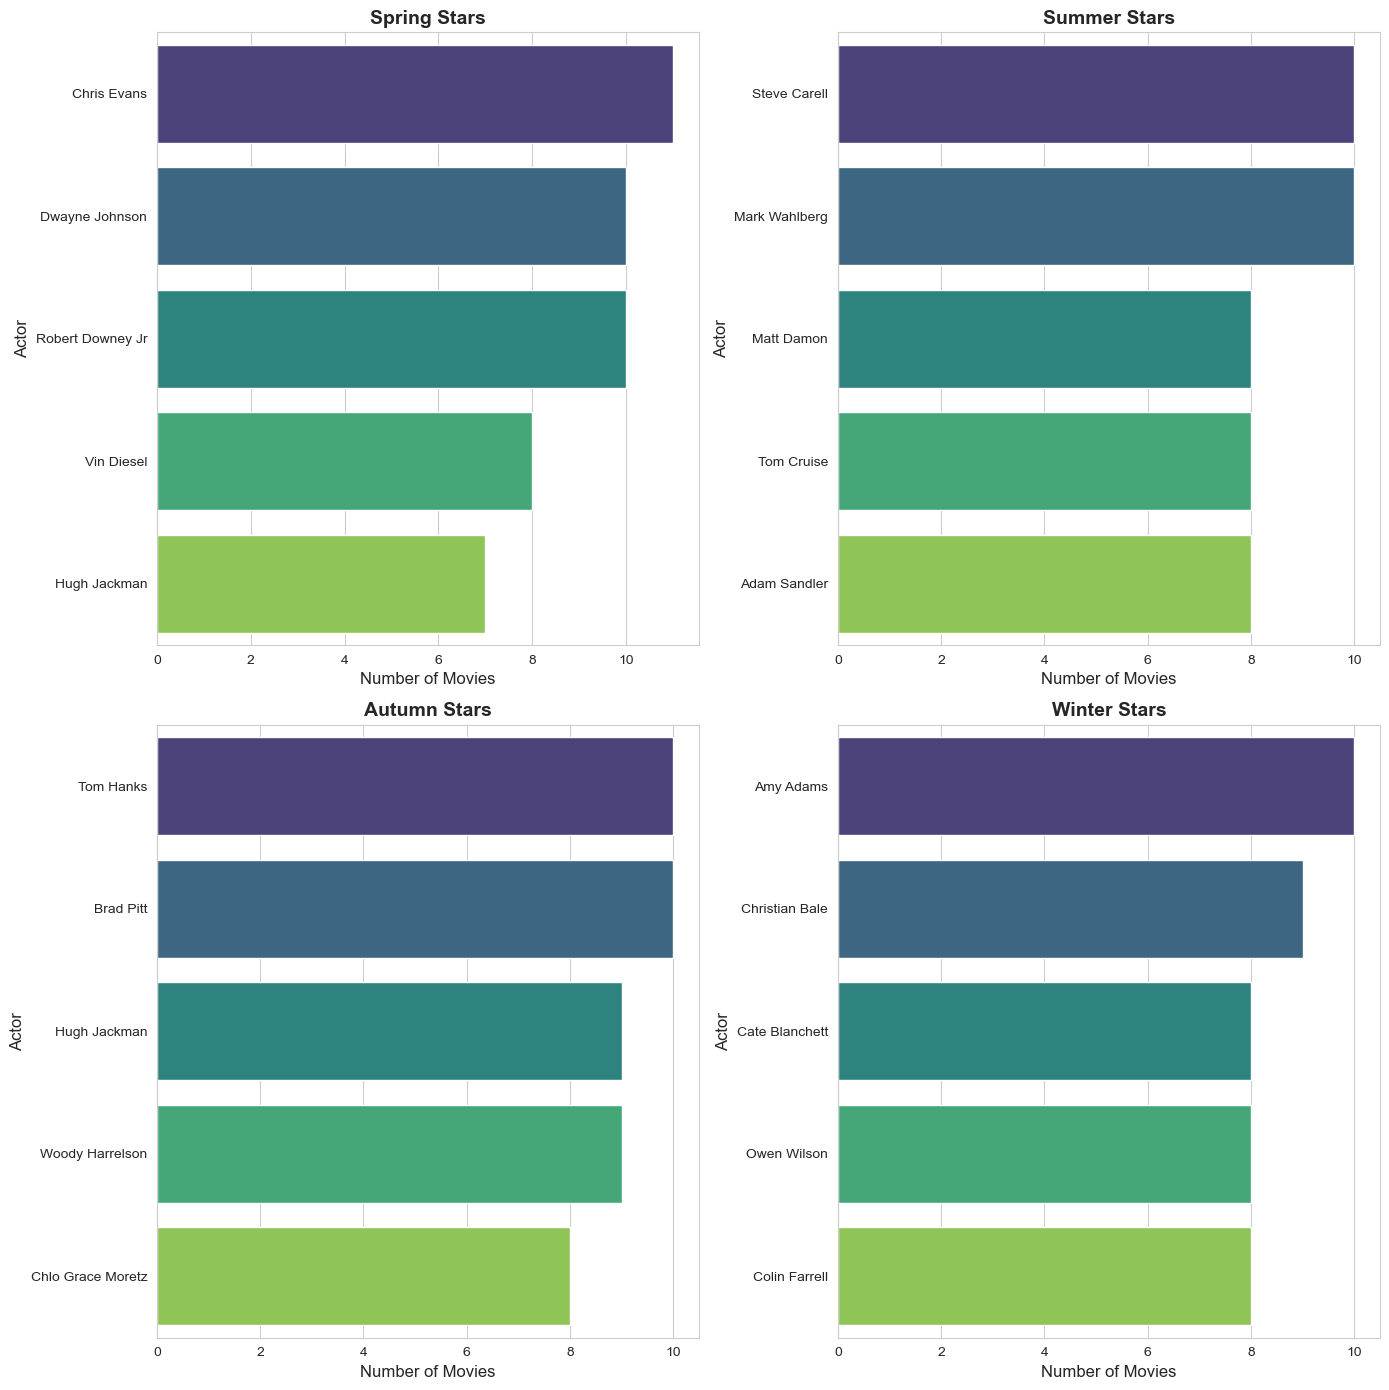

In [553]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# 데이터와 제목을 subplot에 매핑
season_stars = [
    (Spring_Stars, 'Spring Stars'),
    (Summer_Stars, 'Summer Stars'),
    (Autumn_Stars, 'Autumn Stars'),
    (Winter_Stars, 'Winter Stars')
]

# 각 subplot에 그래프 그리기
for ax, (data, title) in zip(axes.flatten(), season_stars):
    sns.barplot(x=data.head(5).values, y=data.head(5).index, ax=ax, palette='viridis')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Number of Movies', fontsize=12)
    ax.set_ylabel('Actor', fontsize=12)

# 레이아웃 조정
plt.tight_layout()
plt.show()